In [1]:
import pip
def import_or_install(package):
    try:
        __import__(package)
    except ImportError:
        pip.main(['install', package])   

import_or_install('importlib')
import_or_install('sys')
import_or_install('os')
import_or_install('pandas')
import_or_install('importlib')
import_or_install("numpy")
import_or_install("matplotlib")
import_or_install("sklearn")
import_or_install("pandas_market_calendars")
import_or_install("scipy")
import_or_install("datetime")
import_or_install("dateutil")

import importlib
import sys
import os,sys
sys.path.insert(1, os.path.join(os.getcwd()  , '..'))

In [2]:

import importlib
import numpy as np
import pandas as pd
import TradingStrategy as ts
import Common.ApiClient as ac
import MA.ExponentialMovingAverageStrategy as ema
import MA.SimpleMovingAverageStrategy as sma

pd.options.mode.chained_assignment = None 
importlib.reload(ts)
importlib.reload(ac)
importlib.reload(ema)
importlib.reload(sma)


<module 'MA.SimpleMovingAverageStrategy' from 'd:\\UW\\EE 596\\stock-ml-mini-project\\src\\MA\\SimpleMovingAverageStrategy.py'>

In [3]:
Api_Key =''
Secret_Key=''
endpoint='https://paper-api.alpaca.markets'

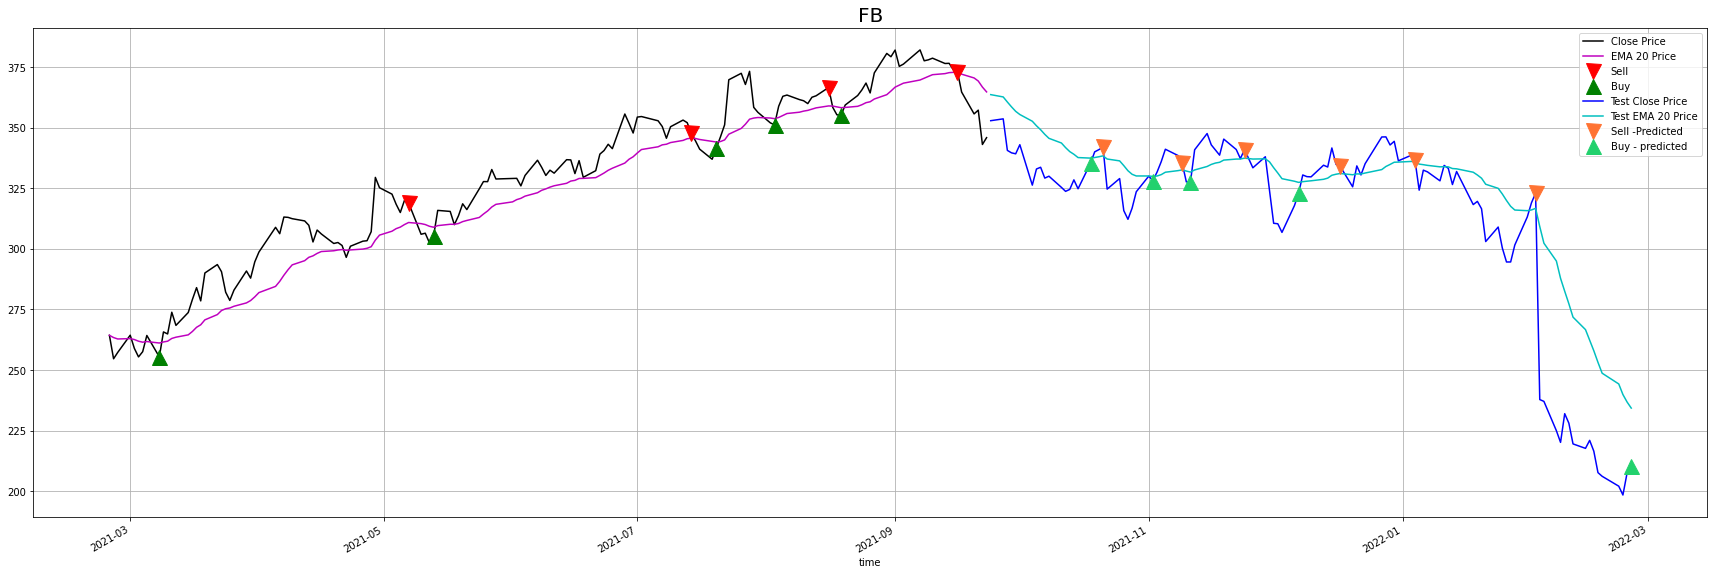

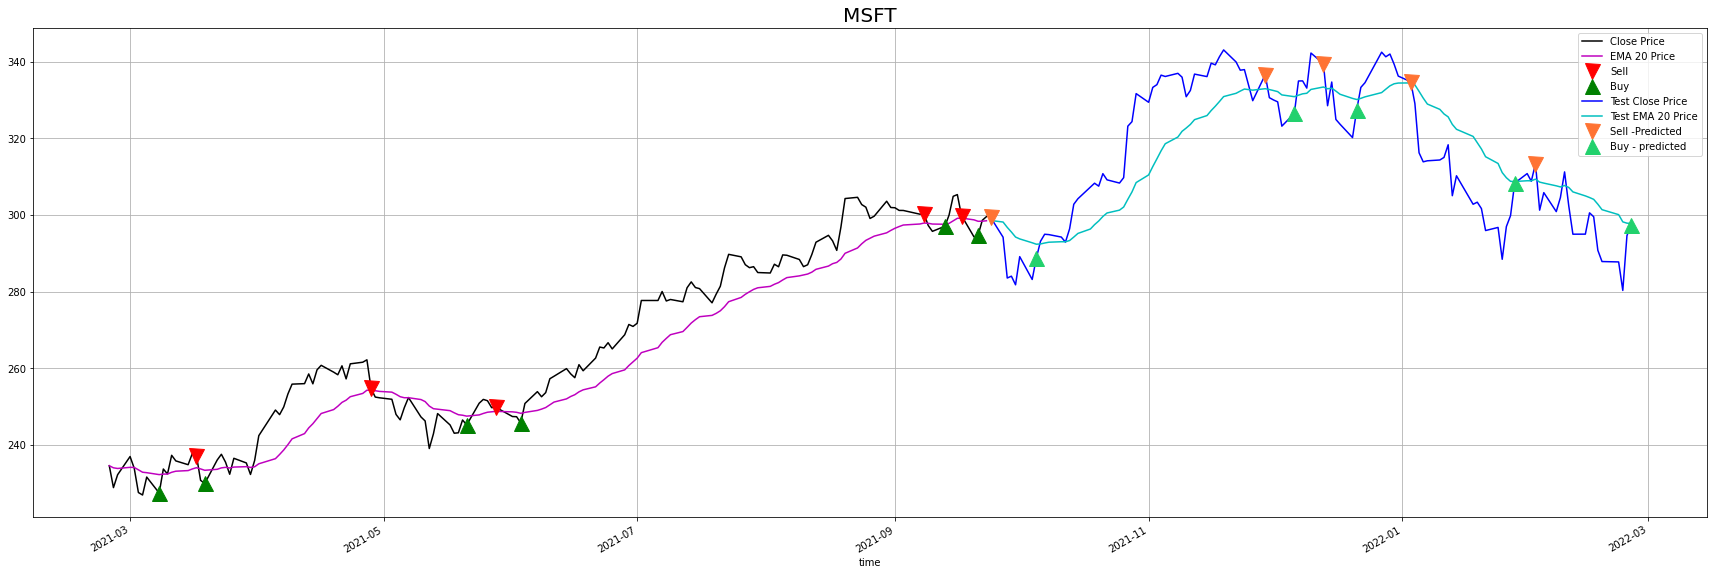

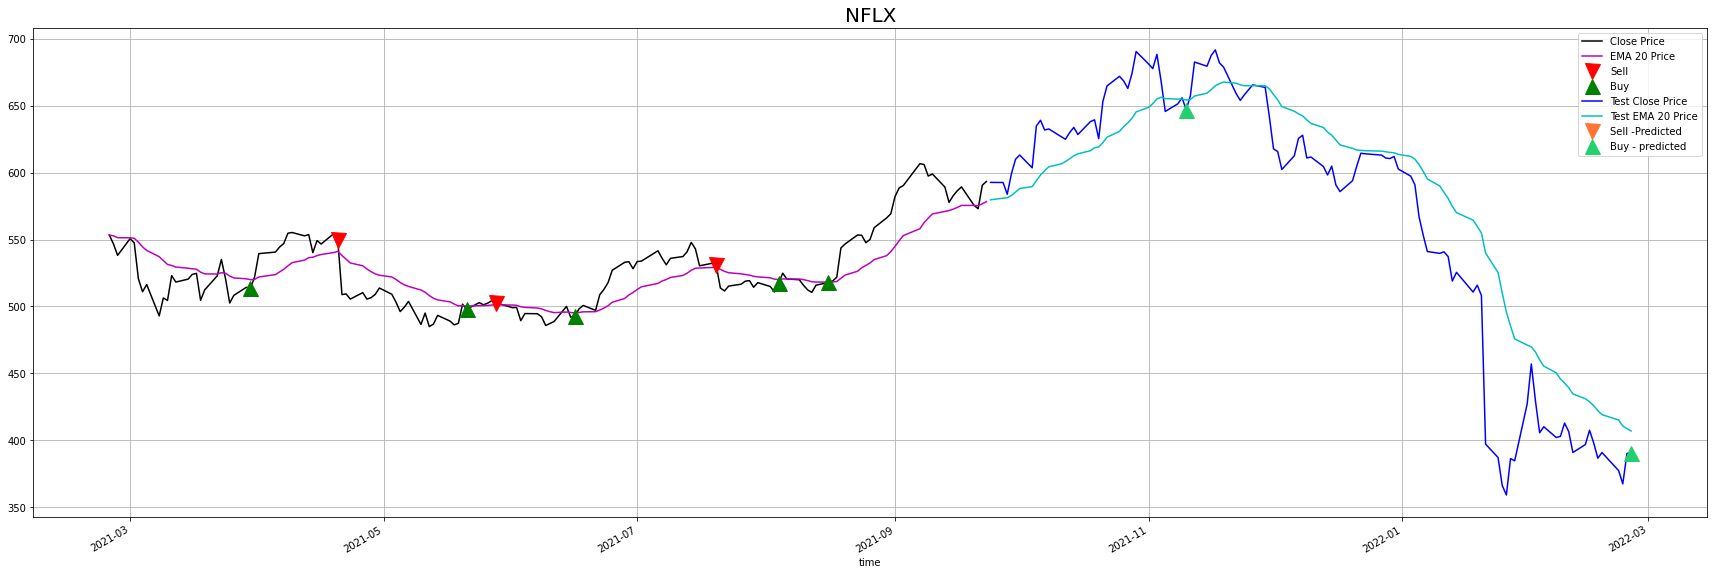

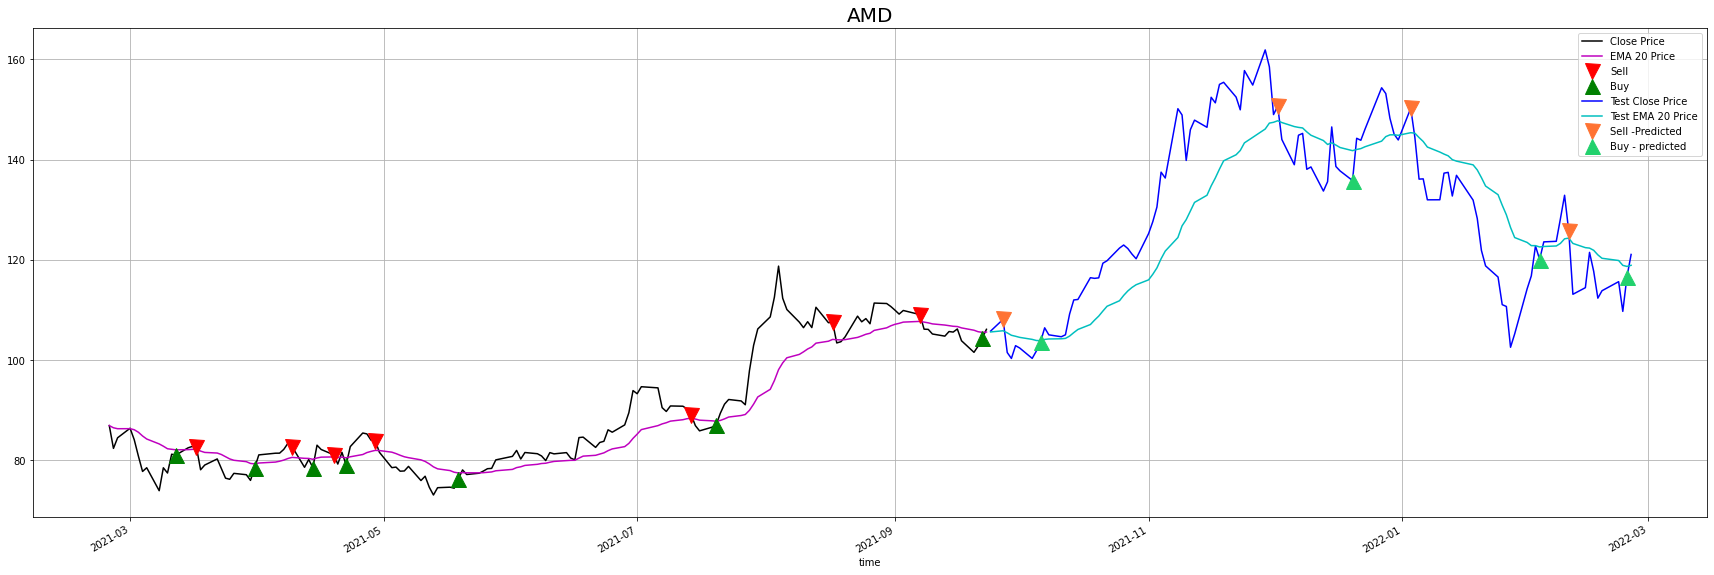

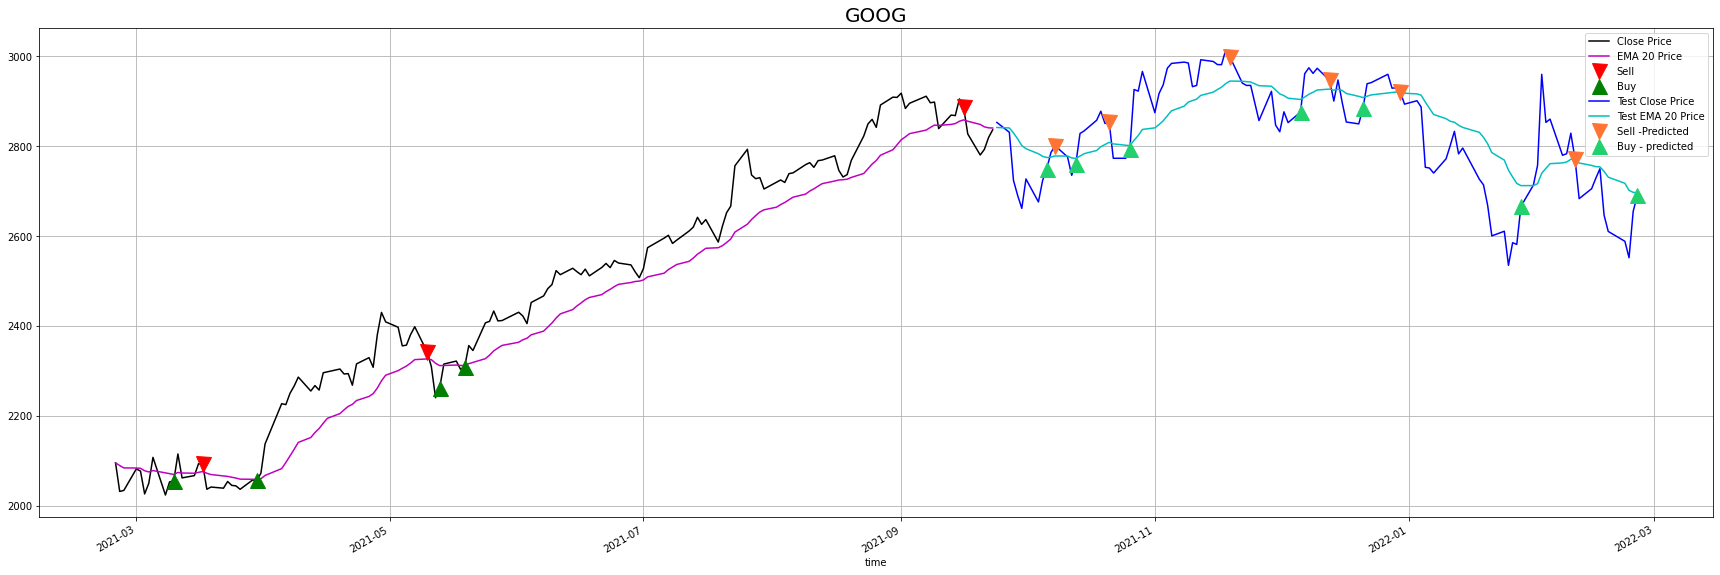

In [4]:


client = ac.ApiClient(api_key_Id=Api_Key,api_key_secret=Secret_Key)


for ticker in ["FB","MSFT","NFLX","AMD","GOOG"]:
    df= client. get_closing_price(ticker,255)

    ema_instance = ema.ExponentialMovingAverageStrategy(df=df,ticker=ticker) # you can replace this with SimpleMovingAverage
    ema_instance.generate_train_model(ticker=ticker)

         
 



In [5]:
current=client.get_last_trade("MSFT")
current

Trade({   'cond1': 0,
    'cond2': 0,
    'cond3': 0,
    'cond4': 0,
    'exchange': 15,
    'price': 297.46,
    'size': 100,
    'timestamp': 1645822796343052796})

In [6]:
trading_st = ts.TradingStrategy("MSFT")

print(f'original:{len(trading_st.predicted)}')
print(trading_st.trained_model.iloc[-1])


d= trading_st.update_model()
print(f'predicted:{len(trading_st.predicted)}')
print(trading_st.trained_model.iloc[-1])

ValueError: ('Key ID must be given to access Alpaca trade API', ' (env: APCA_API_KEY_ID)')

In [ ]:
from sklearn.metrics import mean_squared_error
def calculate_indicators(y_true, y_pred):
    print(f'MSE: {mean_squared_error(y_true, y_pred)}')
    print(f'RMSE: {mean_squared_error(y_true, y_pred)**0.5}')

In [ ]:
ticker="AMD"
df= client. get_closing_price(ticker,255)


ema_instance = ema.ExponentialMovingAverageStrategy(df=df,ticker=ticker)

feature_transform, label, scalar_transformer=ema_instance.create_feature_label(20,'close',3)

In [ ]:
ema_instance.df.head()

,close,min,max,ema_20
time,,,,
2021-02-24 00:00:00-05:00,0.155951,0.0,0.576984,0.134346
2021-02-25 00:00:00-05:00,0.104774,0.0,0.000000,0.128186
2021-02-26 00:00:00-05:00,0.128589,0.0,0.000000,0.125479
2021-03-01 00:00:00-05:00,0.149983,0.0,0.000000,0.125605
2021-03-02 00:00:00-05:00,0.124198,0.0,0.000000,0.122616


In [ ]:

X_train ,y_train, X_test,y_test= ema_instance.split_train_test_data(feature_transform, label)

predictor =ema_instance.fit(X_train, y_train)

y_pred = predictor.predict(X_test)

calculate_indicators(y_test,y_pred)

train= pd.DataFrame(columns=X_train.columns, data=scalar_transformer.inverse_transform(X_train), index=X_train.index)
test=  pd.DataFrame(columns=X_test.columns, data=scalar_transformer.inverse_transform(X_test), index=X_test.index)


MSE: 0.0
RMSE: 0.0


In [ ]:
train["signal"] = y_train
test["signal"] = y_pred

ema_instance.plot_buy_sell_point(train,"ema_20",20,test)


TypeError: plot_buy_sell_point() missing 1 required positional argument: 'ticker'